## 練習時間
#### 請寫一個函式用來計算 Mean Square Error
$ MSE = \frac{1}{n}\sum_{i=1}^{n}{(Y_i - \hat{Y}_i)^2} $

### Hint: [如何取平方](https://googoodesign.gitbooks.io/-ezpython/unit-1.html)

# [作業目標]
- 仿造範例的MAE函數, 自己寫一個MSE函數(參考上面公式)

# [作業重點]
- 注意程式的縮排
- 是否能將數學公式, 轉換為 Python 的函式組合? (In[2], Out[2])

In [0]:
# 載入基礎套件與代稱
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def mean_absolute_error(y, yp):
    """
    計算 MAE
    Args:
        - y: 實際值
        - yp: 預測值
    Return:
        - mae: MAE
    """
    mae = MAE = sum(abs(y - yp)) / len(y)
    return mae

# 定義 mean_squared_error 這個函數, 計算並傳回 MSE
def mean_squared_error(y, y_hat):
    """
    請完成這個 Function 後往下執行
    """
    return sum((y-y_hat)**2)/len(y)

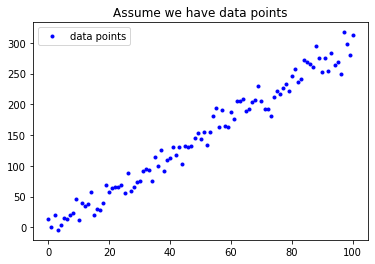

In [0]:
# 與範例相同, 不另外解說
w = 3
b = 0.5
x_lin = np.linspace(0, 100, 101)
y = (x_lin + np.random.randn(101) * 5) * w + b

plt.plot(x_lin, y, 'b.', label = 'data points')
plt.title("Assume we have data points")
plt.legend(loc = 2)
plt.show()

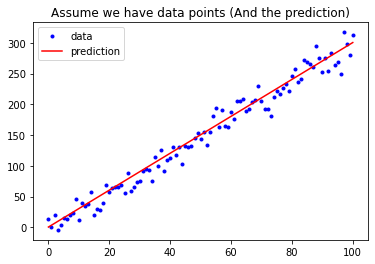

In [0]:
# 與範例相同, 不另外解說
y_hat = x_lin * w + b
plt.plot(x_lin, y, 'b.', label = 'data')
plt.plot(x_lin, y_hat, 'r-', label = 'prediction')
plt.title("Assume we have data points (And the prediction)")
plt.legend(loc = 2)
plt.show()

In [0]:
# 執行 Function, 確認有沒有正常執行
MSE = mean_squared_error(y, y_hat)
MAE = mean_absolute_error(y, y_hat)
print("The Mean squared error is %.3f" % (MSE))
print("The Mean absolute error is %.3f" % (MAE))

The Mean squared error is 211.215
The Mean absolute error is 11.620


# [作業2]

請上 Kaggle, 在 Competitions 或 Dataset 中找一組競賽或資料並寫下：

## **Trending YouTube Video Statistics**
#### **Daily statistics for trending YouTube videos**

Data includes the 1.video title, 2.channel title, 3.publish time, 4.tags, views, 5.likes and dislikes, 6.description, and 7.comment count.

<br/>

---

<br/>

Q1: 你選的這組資料為何重要

A1: Youtube 在全球有約**19億**用戶，在這樣的強大影響力下，其平台刊登的發燒影片所隱含的趨勢指標(e.g.最受歡迎的類別的每月變化趨勢)，除了反應**觀眾**的喜好變化，也透露出影音串流平台整個**產業生態圈**的變動趨勢。

這些資料除了有助於量化**觀眾特質**，對於**影音內容生產**策略(直播主)、**商品行銷**策略(廣告主)、**產品挖掘**(產品團隊)以及**自然語言處理**研究提供重要的參考數據。

具體來說此資料集可以進行下列探索：

1. Sentiment analysis in a variety of forms
2. Categorising YouTube videos based on their comments and statistics.
3. Training ML algorithms like RNNs to generate their own YouTube comments.
4. Analysing what factors affect how popular a YouTube video will be.
5. Statistical analysis over time.

除了上列方向，我更感興趣的是如何利用此資料集加上 comments 的收集，建構不同類型的 virtual haters/fans (Chatbots)

<br/>

Q2: 資料從何而來 (tips: 譬如提供者是誰、以什麼方式蒐集)

A2: 資料由英國軟體開發者 Mitchell Jolly 所提供。他利用網路爬蟲技術結合 YouTube Data API，根據不同的國家爬取出 Youtube 發燒影片的資料集。在 Mitchell 的 Github 也提供了爬蟲程式碼 https://github.com/mitchelljy/Trending-YouTube-Scraper ，可以基於此程式碼爬取台灣的發燒影片資料集。 

<br/>

Q3: 蒐集而來的資料型態為何

A3: 此資料集分成 10 個國家 (CA, DE, FR, GB, IN, JP, KR, MX, RU, US) ，每個國家提供 .json, .csv 兩種檔案格式。資料由 16 column 所構成，String 佔了 50% ，Number 佔了 31% ， Bool 佔了 19%。 

<br/>

Q4: 這組資料想解決的問題如何評估

A4: 只利用這組資料無法建構 virtual haters/fans ，需加上相對應的 comments 資料。因此問題變成，依據擴充的資料所建構出的 chatbots ，該如何評估他的信、效度。目前想到兩個方向(以 hater 為例)：

1. 信度分析 (reliability analysis): 某類別的 virtual hater comment 透過二元類別分析是否符合資料集的類別標籤(like/dislike)
2. 效度分析 (validity analysis): 利用問卷，分析 virtual hater comment 對於一般人來說是否被標成 hater 的機率顯著高於 fan 的機率。

p.s. 進行分析前需要定義什麼是 hater/fan ， like/dislike on comments 與 like/dislike on video 如何定義 hater/fan。

<br/>

---

# [作業3]

想像你經營一個自由載客車隊，你希望能透過數據分析以提升業績，請你思考並描述你如何規劃整體的分析/解決方案：

<br/>

---

<br/>

Q1: 核心問題為何 (tips：如何定義 「提升業績 & 你的假設」)

A1: 提升業績可以理解為提升公司的整體營業額，若把空車時間當作 WIP 在此假設下思考的方向有二：
1. 提高每台車每天的載客人數(減少 WIP ): 此思路假設 constraint factor 為車子的利用/載客率，因此提升載客率為主要策略。
2. 增加不同地區的車隊數量: 此思路假設當 WIP 獲得有效控制後，所反映出的是目前的地區市場趨於飽和， constraint factor 轉變為地區市場，因此開發其他市場，在其他地區建立車隊解除 constraint factor 為主要策略。

<br/>

Q2: 資料從何而來 (tips：哪些資料可能會對你想問的問題產生影響 & 資料如何蒐集)

A2: 關鍵資料有
1. 本車隊每車每日營業額
2. 本車隊每車每日營業時數 
3. 本車隊每車每日空車累計時數
4. 本車隊各地區營業車數 
5. 本車隊每位司機評價 
6. 本車隊每台車營業範圍 
7. 各地區消費人口
8. 地區地圖與相關資料

資料收集方式:

  7.各地區消費人口 8. 地區地圖與相關資料 可從政府官方管道取得。

  1.本車隊每車每日營業額 2. 本車隊每車每日營業時數  3. 本車隊每車每日空車累計時數 4. 本車隊各地區營業車數  5. 本車隊每位司機評價 6. 本車隊每台車營業範圍 可建構 mobile app 讓司機與顧客使用，擷取相關資訊。  

<br/>

Q3. 蒐集而來的資料型態為何

1. 本車隊每車每日營業額 (number)
2. 本車隊每車每日營業時數 (number)
3. 本車隊每車每日空車累計時數 (number)
4. 本車隊各地區營業車數 (number)
5. 本車隊每位司機評價 (number)
6. 本車隊每台車子營業地圖/熱區 (地區類別 string, 熱區 graphic -> number)
7. 各地區消費人口 (number)
8. 地區地圖/熱區與相關資料 (地區類別 string, 熱區 graphic -> number)

Q4. 你要回答的問題，其如何評估 (tips：你的假設如何驗證)
1. 首先須了解各地區整體車隊載客率是否合理，亦即分析車隊載客率分佈。
2. 分析分佈偏態、與集中情形
3. 進行各地區載客率與營業額回歸分析，驗證空車是否為 constraint factor
4. 若是，利用多元回歸思考其他因素對於載客率的貢獻度，參考結果進行產品探勘
5. 若否，分析區域差異...等等

(p.s. 根據初步資料分析結果的不同，接連的分析策略也須靈活應變，上述只是某種情境下的可能評估**之一**)